In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import math
from ipywidgets import *
from functools import reduce

# Central Limit Theorems

The 'classical' Central Limit Theorem states that if have IID variables where the variance of the marginal distribution is finite, then the sum of the variables is converging in distribution to a **Normal distribution**.

Thus, if $X_1,X_2,\dots,X_n$ are IID variables where $\mathbb{E}(X_i)=\mu$ and $\mathbb{V}(X_i)=\sigma^2$, then for $W_n=\sum_{i=1}^n X_i$ we can write 
\begin{equation}
W_n \overset{\rm d}{\longrightarrow} N(n\mu,\sqrt{n}\sigma), \nonumber
\end{equation}
where we used the fact that both the sum and the variance can be simply summed for independent variables. As we can see, when $n\rightarrow\infty$, we obtain a Normal distribution with infinitely large mean and variance. 

The usual trick is to consider a **standardised** version of the sum of the variables, where we shift the variable such that the mean becomes 0 and rescale the variable such that the variance becomes 1. In this case this can be done simply by defining $Z_n$ as
\begin{equation}
Z_n =\frac{\left(\sum_{i=1}^n X_i\right) -n\mu}{\sqrt{n}\sigma}=
\frac{\frac{1}{n}\left(\sum_{i=1}^n X_i\right) - \mu}{\sigma/\sqrt{n}} =\frac{\sqrt{n}\left(\overline{X_n}-\mu\right)}{\sigma},
\end{equation}
which is converging to standard Normal in distribution, 
\begin{equation}
Z_n\overset{\rm d}{\longrightarrow}N(0,1).
\end{equation}

Let's try this out. 

We are going to generate $n$ sample sets using numpy, and then add the data points from the different samples to "simulate" $Z_n$.


First we define the parameters of our study, the number of data points in each sample, and the number of sample sets.

In [2]:
num_points = 20000;  # we are going to have this many random numbers in one given sample
n = 50;              # and we generate this many different samples.

## Summing uniformly distributed variables

Probably the most simple case is when the individual $X_i$ variables are distributed uniformly.

In [3]:
distr_list = [np.random.uniform(low=0,high=1,size= num_points) for i in range(0,n)];

We define a function that can sum up to a specified number of variables, and return the distribution of the result. We also include the **standardisation** in the process, i.e., subtract the mean and divide by the standard deviation. 

In [37]:
def Sum_distr(distr_list,sum_size):
    s_distr = [sum([distr_list[i][j] for i in range(0,sum_size)]) for j in range(0,len(distr_list[0]))];
    s_mean,s_var = np.mean(s_distr),np.var(s_distr,ddof=1.0);
    c_distr = [ (x-s_mean)/math.sqrt(s_var) for x in s_distr];
    #c_distr = [ (x-s_mean) for x in s_distr];
    return c_distr;

We apply the above function to the generated list of sample lists.

In [35]:
sum_distr_list = [Sum_distr(distr_list,num_in_sum) for num_in_sum in range(1,n+1)];    

And we plot the standardised distributions of the summed variables. 

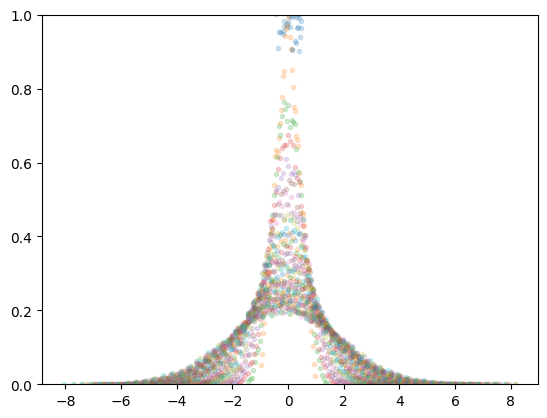

In [36]:
plt.clf();
for s_distr in sum_distr_list:
    hist,bins = np.histogram(s_distr,bins=50,density=True);
    plt.plot(bins[:-1],hist,'o',markersize=3,alpha=0.2);
    plt.ylim(0,1.0);
plt.show();

It is instructive to see what happens when the standardisation is not carried out properly. **Try to mess up the standardisation and see what happens.**

We can also make an interactive plot where the number of variables summed can be controlled by a slider.

First we need to define a plotting function taking the number of summed variables as an argument. 

In [7]:
def Plot_sum_distr(s_distr_list,chosen_distr_id):
    hist,bins = np.histogram(s_distr_list[chosen_distr_id-1],bins=50,density=True);
    plt.plot(bins[:-1],hist);
    x_list = np.arange(-4,4,0.1);
    y_list = [math.exp(-0.5*x**2)/math.sqrt(2.0*np.pi) for x in x_list];
    plt.plot(x_list,y_list);
    plt.xlabel(r'$\frac{x-\overline{X}}{\rm sd}$')
    plt.ylim(0,1.0);
    plt.xlim(-4,4);
    plt.show();

And then we can turn this into an interactive window with a slider.

In [8]:
interact(Plot_sum_distr,s_distr_list=fixed(sum_distr_list),
         chosen_distr_id = IntSlider(min=1,max=n,step=1,value=1,description='num. distr. summed'))

interactive(children=(IntSlider(value=1, description='num. distr. summed', max=50, min=1), Output()), _dom_cla…

<function __main__.Plot_sum_distr(s_distr_list, chosen_distr_id)>

Let's repeat the above for e.g., exponentially distributed variables.

In [9]:
exp_distr_list = [np.random.exponential(3.0,num_points) for i in range(0,n)];

In [10]:
sum_exp_distr = [Sum_distr(exp_distr_list,num_in_sum) for num_in_sum in range(1,n+1)];    

In [11]:
interact(Plot_sum_distr,s_distr_list=fixed(sum_exp_distr),
         chosen_distr_id = IntSlider(min=1,max=n,step=1,value=1,description='num. distr. summed'))

interactive(children=(IntSlider(value=1, description='num. distr. summed', max=50, min=1), Output()), _dom_cla…

<function __main__.Plot_sum_distr(s_distr_list, chosen_distr_id)>

## Summing heavy tailed distributions

The central limit theorem for heavy tailed distributions with diverging variance is different. Let's have a look at that too.

In [12]:
pareto_a = 1.5;

In [13]:
pareto_distr_list = [np.random.pareto(pareto_a,num_points) for i in range(0,n)];

The key difference is that if the PDF of the marginal is decaying as $x^{-\alpha}$ (where $2<\alpha<3$), then we have to 'standardise' the sum by dividing with $n^{1/\mu}$, where $\mu=\alpha-1$.

Thus, the summing function in this case has to take an argument corresponding to $\mu$ as well.

In [14]:
def Sum_Pareto(distr_list,sum_size,mu):
    s_distr = [sum([distr_list[i][j] for i in range(0,sum_size)]) for j in range(0,len(distr_list[0]))];
    s_mean = np.mean(s_distr);
    c_distr = [ (x-s_mean)/sum_size**(1.0/mu) for x in s_distr];
    return c_distr;

Let's try this out when we set $\mu$ correctly and also when we set it wrong.

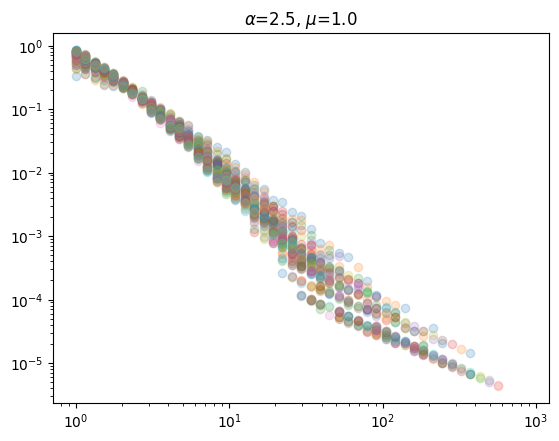

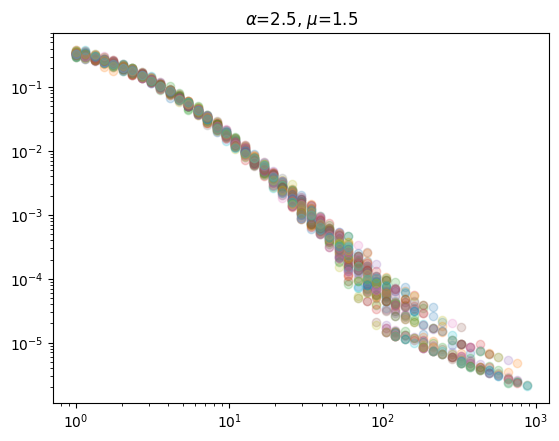

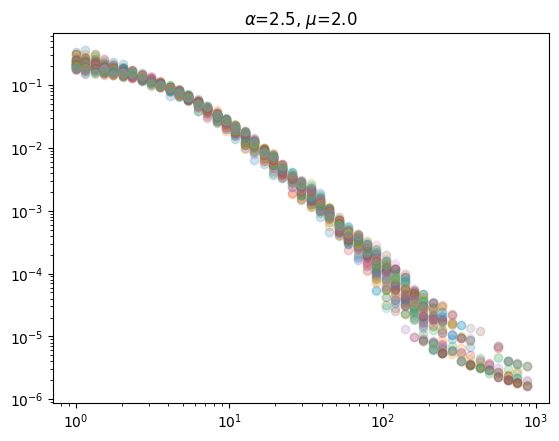

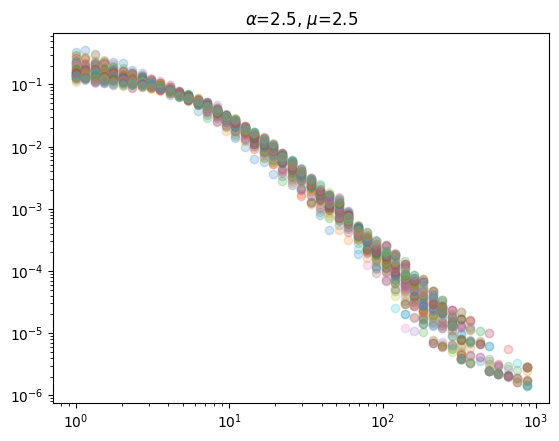

In [15]:
mu = 1.0;
sum_par_distr = [Sum_Pareto(pareto_distr_list,n,mu) for n in range(1,n+1)];   
plt.clf();
for s_distr in sum_par_distr:
    hist,bins = np.histogram(s_distr,bins=np.logspace(0,3,50),density=True);
    plt.loglog(bins[:-1],hist,'o',alpha = 0.2);
    plt.title(r'$\alpha$='+str(pareto_a+1)+', $\mu$='+str(mu));
plt.show();

mu = 1.5;
sum_par_distr = [Sum_Pareto(pareto_distr_list,n,mu) for n in range(1,n+1)];   
plt.clf();
for s_distr in sum_par_distr:
    hist,bins = np.histogram(s_distr,bins=np.logspace(0,3,50),density=True);
    plt.loglog(bins[:-1],hist,'o',alpha = 0.2);
    plt.title(r'$\alpha$='+str(pareto_a+1)+', $\mu$='+str(mu));
plt.show();

mu = 2.0;
sum_par_distr = [Sum_Pareto(pareto_distr_list,n,mu) for n in range(1,n+1)];   
plt.clf();
for s_distr in sum_par_distr:
    hist,bins = np.histogram(s_distr,bins=np.logspace(0,3,50),density=True);
    plt.loglog(bins[:-1],hist,'o',alpha = 0.2);
    plt.title(r'$\alpha$='+str(pareto_a+1)+', $\mu$='+str(mu));
plt.show();

mu = 2.5;
sum_par_distr = [Sum_Pareto(pareto_distr_list,n,mu) for n in range(1,n+1)];   
plt.clf();
for s_distr in sum_par_distr:
    hist,bins = np.histogram(s_distr,bins=np.logspace(0,3,50),density=True);
    plt.loglog(bins[:-1],hist,'o',alpha = 0.2);
    plt.title(r'$\alpha$='+str(pareto_a+1)+', $\mu$='+str(mu));
plt.show();

Of course, we can also make an interactive plot with a slider in a similar fashion to the normal Central Limit Theorem.

In [16]:
def Plot_sum_Pareto(sum_distr_list,chosen_distr_id):
    hist,bins = np.histogram(sum_distr_list[chosen_distr_id-1],bins=np.logspace(0,3,50),density=True);
    plt.loglog(bins[:-1],hist);
    plt.xlim(1,1000);
    plt.ylim(0.0001,1);
    plt.show();

In [17]:
interact(Plot_sum_Pareto,sum_distr_list=fixed(sum_par_distr),
         chosen_distr_id = IntSlider(min=1,max=n,step=1,value=1,description='num. distr. summed'))

interactive(children=(IntSlider(value=1, description='num. distr. summed', max=50, min=1), Output()), _dom_cla…

<function __main__.Plot_sum_Pareto(sum_distr_list, chosen_distr_id)>

## Stock market simulation II.

Returning to the simulation of stock values: What happens if the value is changed by **multiplying** with a random variable $x$ instead of adding? 

In this setting, probably the simplest scenario is when $P(x=r)=1/2$ and $P(x=1/r)=1/2$. Let's try it out!

First we specify the parameters.

In [18]:
change_fact = 1.05;        # this is what we denoted as "r" in the above.
num_stocks = 5;            # number of stocks
num_time_steps = 10000;    # length of the time series

We can use the builf in function reduce() to subsequently multiply the elements from a previously generated random sequence of $r$ and $1/r$.

In [19]:
stock_time_series_list = [];
stock_time_series_list.clear();
for i in range(0,num_stocks):
    rand_changes = list(np.random.choice([change_fact,1.0/change_fact],num_time_steps)); # these are the random 
                                                                                         # r and 1/r factors.
    stock_value = [reduce((lambda x,y: x*y),rand_changes[0:n]) for n in range(1,len(rand_changes))];
    stock_time_series_list.append(stock_value);

- **Try to make a plot of the obtained stock value series as before**
- **What is different compared to the more simple additive simulation?**
- **What is the distribution of the stock values after a sufficient number of time steps?**

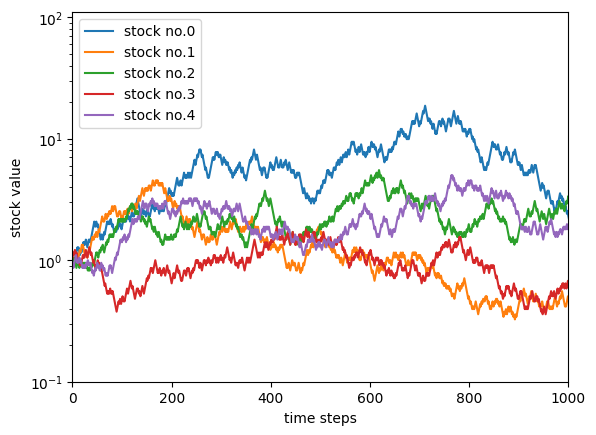

<Figure size 640x480 with 0 Axes>

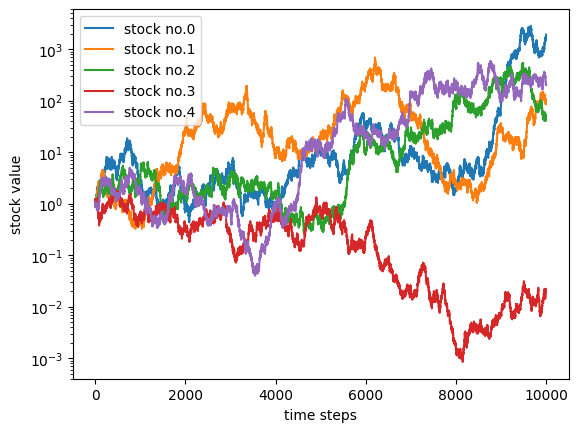

In [20]:
plt.clf();
t_list = range(0,len(stock_time_series_list[0]));
for i in range(0,len(stock_time_series_list)):
    plt.semilogy(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
plt.xlim(0,1000);
plt.ylim(0.1,110);
#plt.ylim(-50,50)
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();

plt.clf();
fig,ax = plt.subplots();
for i in range(0,len(stock_time_series_list)):
    plt.semilogy(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
#plt.ylim(-300,300);
#rect = patches.Rectangle((0,-95),1000,190,edgecolor='r',facecolor='r', alpha = 0.1);
#ax.add_patch(rect);
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();